# Practical Application of Statistics Concepts (Titanic Dataset)
**Shubham Verma**

**Linkedin** https://www.linkedin.com/in/shubham-verma-3968a5119

**Theory**
1. stat 1: https://www.linkedin.com/posts/shubham-verma-3968a5119_stats-notes-1-activity-6971835885327716352-739b?utm_source=share&utm_medium=member_desktop
2. stat 2: https://www.linkedin.com/posts/shubham-verma-3968a5119_stats-day-2-activity-6972454558438502400-HFkm?utm_source=share&utm_medium=member_desktop
3. stat 3: https://www.linkedin.com/posts/shubham-verma-3968a5119_stats-3-activity-6974971613096140800-hkHU?utm_source=share&utm_medium=member_desktop
4. stat 4: https://www.linkedin.com/posts/shubham-verma-3968a5119_stats-4-activity-6974983725113630720-G8-U?utm_source=share&utm_medium=member_desktop

**Credits** Krish Naik Sir for Theory

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as stat
import matplotlib.pyplot as plt
import random

## 0.0 Titanic dataset

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**0.1 Data Conversion and Numerical Dataset**

In [3]:
# converting class values to integer and type from category to int64
df['class'] = df['class'].replace('First', 1).replace('Second',2).replace('Third', 3)
df['class'] = df['class'].astype('int64')

In [4]:
# converting alone values to integer and type from bool to int64
df['alone'] = df['alone'].replace('True', 1).replace('False',2)
df['alone'] = df['alone'].astype('int64')

In [5]:
df_numerical = df[df.dtypes[df.dtypes != "object"].index]

In [6]:
df_numerical.drop(["adult_male","deck"], axis=1, inplace=True)

C:\Users\Shubham\AppData\Local\Temp\ipykernel_9944\2292370039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical.drop(["adult_male","deck"], axis=1, inplace=True)


In [7]:
df_numerical.head()

,survived,pclass,age,sibsp,parch,fare,class,alone
0,0,3,22.0,1,0,7.2500,3,0
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,3,1
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,3,1


**0.2 Checking dataset for NAN Values**

In [8]:
df_numerical.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
class         0
alone         0
dtype: int64

**0.3 Mean and Median of age**

In [9]:
np.mean(df_numerical['age'])

29.69911764705882

In [10]:
np.median(df_numerical['age'])

nan

**0.4 Boxplot for checking outliers**

<AxesSubplot:>

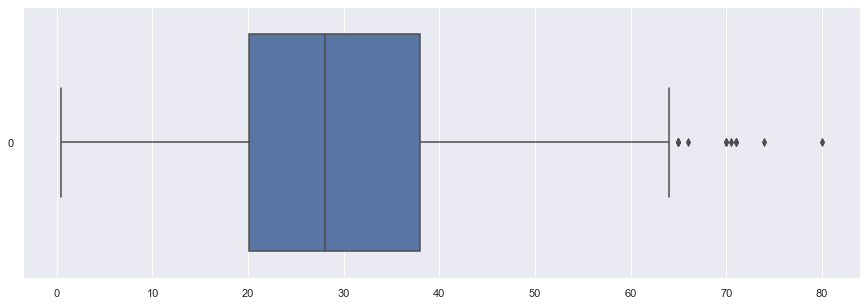

In [12]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=df_numerical['age'], orient="h")

#since age column contains outliers so it is better to use median for filling NAN values but the median of 
#age is NAN itself so using mean of age to fill NAN values

**0.5 Replacing NaN Values with Mean**

In [13]:
df_numerical['age'].fillna(np.mean(df_numerical['age']), inplace=True)

C:\Users\Shubham\AppData\Local\Temp\ipykernel_9944\1010884794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical['age'].fillna(np.mean(df_numerical['age']), inplace=True)


In [14]:
df_numerical['age'].isnull().sum() # no NaN values present in age column now

0

In [16]:
df_numerical.isnull().sum() # no NaN values in Numerical dataset

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
class       0
alone       0
dtype: int64

# 1.0 Measure of Central Tendency

### 1.1 Mean of all numeric columns

In [15]:
np.mean(df_numerical, axis=0)

survived     0.383838
pclass       2.308642
age         29.699118
sibsp        0.523008
parch        0.381594
fare        32.204208
class        2.308642
alone        0.602694
dtype: float64

### 1.2 Median of all numeric columns

In [16]:
np.median(df_numerical, axis=0)

array([ 0.        ,  3.        , 29.69911765,  0.        ,  0.        ,
       14.4542    ,  3.        ,  1.        ])

### 1.3 Mode of all columns

In [17]:
df.mode()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,24.0,0,0,8.05,S,3,man,True,C,Southampton,no,1


In [18]:
# for individual columns 
stat.mode(df['age'])

24.0

# 2.0 Measure of Dispersion

### 2.1 Variance

In [19]:
df_numerical.var()

survived       0.236772
pclass         0.699015
age          169.052400
sibsp          1.216043
parch          0.649728
fare        2469.436846
class          0.699015
alone          0.239723
dtype: float64

In [20]:
# for individual columns 
stat.variance(df_numerical['age'])

169.05239993721082

### 2.2 Standard Deviation 

In [21]:
df_numerical.std()

survived     0.486592
pclass       0.836071
age         13.002015
sibsp        1.102743
parch        0.806057
fare        49.693429
class        0.836071
alone        0.489615
dtype: float64

In [22]:
# for individual columns 
stat.stdev(df_numerical['age'])

13.002015226002884

# 3.0 Five point summary

**3.1 For survived Column**

In [23]:
print("Minimum value is: {}".format(df_numerical['survived'].min()))  # zeroth Percentile or minimum value
print("1st quartile is: {}".format(np.percentile(df_numerical['survived'], 25))) # 1st quartile
print("Median is: {}".format(np.percentile(df_numerical['survived'], 50))) # 2nd quartile or median
print("3rd quartile is: {}".format(np.percentile(df_numerical['survived'], 75))) # 3rd quartile
print("Maximum value is: {}".format(df_numerical['survived'].max())) # 100th Percentile or maximum value

Minimum value is: 0
1st quartile is: 0.0
Median is: 0.0
3rd quartile is: 1.0
Maximum value is: 1


**3.2 For pclass Column**

In [24]:
print("Minimum value is: {}".format(df_numerical['pclass'].min()))  
print("1st quartile is: {}".format(np.percentile(df_numerical['pclass'], 25))) 
print("Median is: {}".format(np.percentile(df_numerical['pclass'], 50))) 
print("3rd quartile is: {}".format(np.percentile(df_numerical['pclass'], 75))) 
print("Maximum value is: {}".format(df_numerical['pclass'].max())) 

Minimum value is: 1
1st quartile is: 2.0
Median is: 3.0
3rd quartile is: 3.0
Maximum value is: 3


**3.3 For age Column**

In [25]:
print("Minimum value is: {}".format(df_numerical['age'].min()))  
print("1st quartile is: {}".format(np.percentile(df_numerical['age'], 25))) 
print("Median is: {}".format(np.percentile(df_numerical['age'], 50))) 
print("3rd quartile is: {}".format(np.percentile(df_numerical['age'], 75))) 
print("Maximum value is: {}".format(df_numerical['age'].max())) 

Minimum value is: 0.42
1st quartile is: 22.0
Median is: 29.69911764705882
3rd quartile is: 35.0
Maximum value is: 80.0


**3.4 For sibsp (Siblings) Column**

In [26]:
print("Minimum value is: {}".format(df_numerical['sibsp'].min()))  
print("1st quartile is: {}".format(np.percentile(df_numerical['sibsp'], 25))) 
print("Median is: {}".format(np.percentile(df_numerical['sibsp'], 50))) 
print("3rd quartile is: {}".format(np.percentile(df_numerical['sibsp'], 75))) 
print("Maximum value is: {}".format(df_numerical['sibsp'].max())) 

Minimum value is: 0
1st quartile is: 0.0
Median is: 0.0
3rd quartile is: 1.0
Maximum value is: 8


**3.5 For parch (parent-child) Column**

In [27]:
print("Minimum value is: {}".format(df_numerical['parch'].min()))  
print("1st quartile is: {}".format(np.percentile(df_numerical['parch'], 25))) 
print("Median is: {}".format(np.percentile(df_numerical['parch'], 50))) 
print("3rd quartile is: {}".format(np.percentile(df_numerical['parch'], 75))) 
print("Maximum value is: {}".format(df_numerical['parch'].max())) 

Minimum value is: 0
1st quartile is: 0.0
Median is: 0.0
3rd quartile is: 0.0
Maximum value is: 6


**3.6 For fare Column**

In [28]:
print("Minimum value is: {}".format(df_numerical['fare'].min()))  
print("1st quartile is: {}".format(np.percentile(df_numerical['fare'], 25))) 
print("Median is: {}".format(np.percentile(df_numerical['fare'], 50))) 
print("3rd quartile is: {}".format(np.percentile(df_numerical['fare'], 75))) 
print("Maximum value is: {}".format(df_numerical['fare'].max())) 

Minimum value is: 0.0
1st quartile is: 7.9104
Median is: 14.4542
3rd quartile is: 31.0
Maximum value is: 512.3292


**3.7 For class Column**

In [29]:
print("Minimum value is: {}".format(df_numerical['class'].min()))  
print("1st quartile is: {}".format(np.percentile(df_numerical['class'], 25))) 
print("Median is: {}".format(np.percentile(df_numerical['class'], 50))) 
print("3rd quartile is: {}".format(np.percentile(df_numerical['class'], 75))) 
print("Maximum value is: {}".format(df_numerical['class'].max())) 

Minimum value is: 1
1st quartile is: 2.0
Median is: 3.0
3rd quartile is: 3.0
Maximum value is: 3


**3.8 For alone Column**

In [30]:
print("Minimum value is: {}".format(df_numerical['alone'].min()))  
print("1st quartile is: {}".format(np.percentile(df_numerical['alone'], 25))) 
print("Median is: {}".format(np.percentile(df_numerical['alone'], 50))) 
print("3rd quartile is: {}".format(np.percentile(df_numerical['alone'], 75))) 
print("Maximum value is: {}".format(df_numerical['alone'].max())) 

Minimum value is: 0
1st quartile is: 0.0
Median is: 1.0
3rd quartile is: 1.0
Maximum value is: 1


# 4.0 Box Plot

### To find outliers

### 4.1 Box plot for survived

<AxesSubplot:>

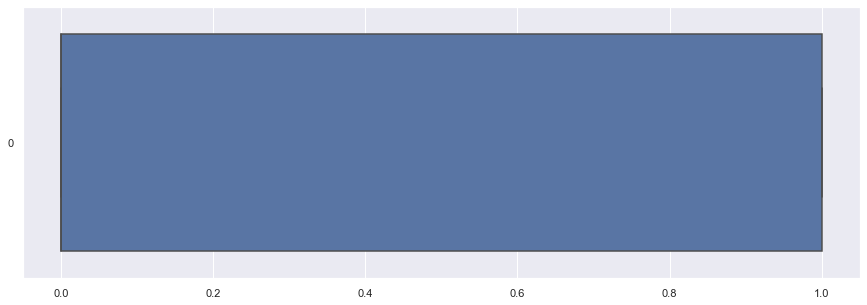

In [31]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=df_numerical['survived'], orient="h")

### 4.2 Box plot for pclass

<AxesSubplot:>

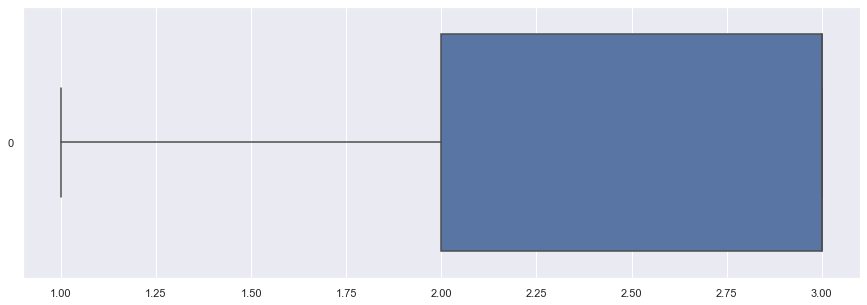

In [32]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=df_numerical['pclass'], orient="h")

### 4.3 Box plot for age

<AxesSubplot:>

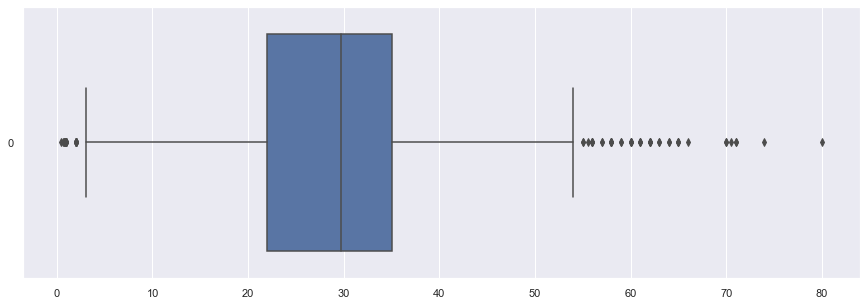

In [33]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=df_numerical['age'], orient="h")

### 4.4 Box plot for sibsp

<AxesSubplot:>

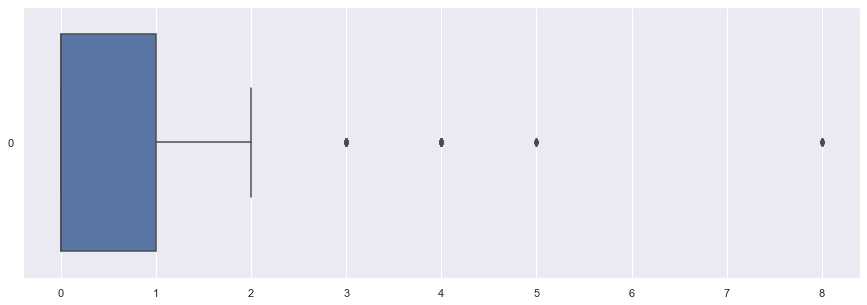

In [34]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=df_numerical['sibsp'], orient="h")

### 4.5 Box plot for parch

<AxesSubplot:>

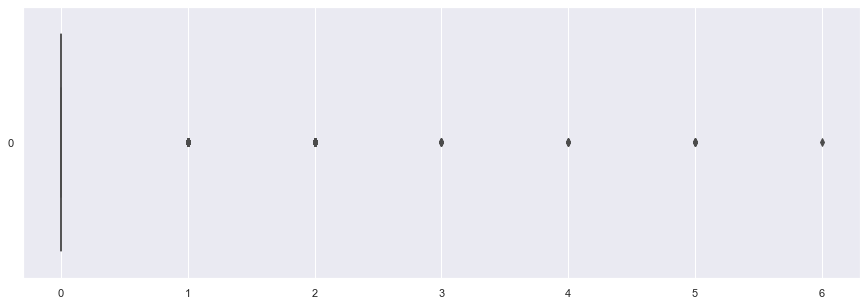

In [35]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=df_numerical['parch'], orient="h")

### 4.6 Box plot for fare

<AxesSubplot:>

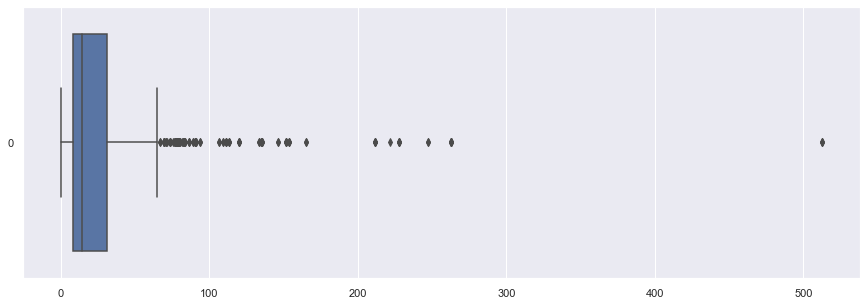

In [36]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=df_numerical['fare'], orient="h")

### 4.7 Box plot for class

<AxesSubplot:>

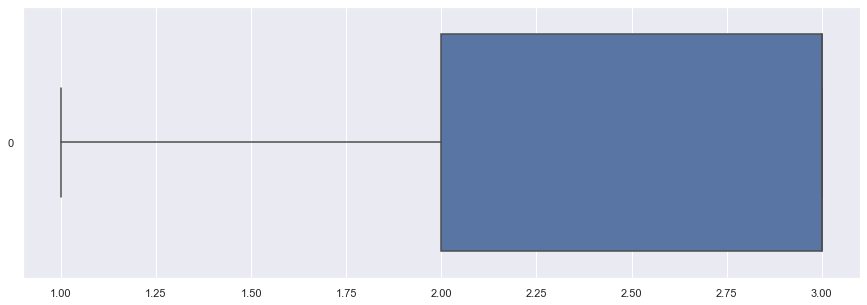

In [37]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=df_numerical['class'], orient="h")

### 4.8 Box plot for alone

<AxesSubplot:>

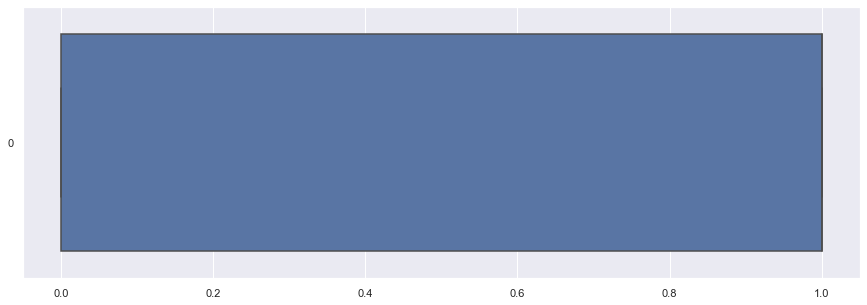

In [38]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=df_numerical['alone'], orient="h")

# 5.0 Histogram and Distribution

### 5.1 Histogram and Distribution for survived

<AxesSubplot:xlabel='survived', ylabel='Count'>

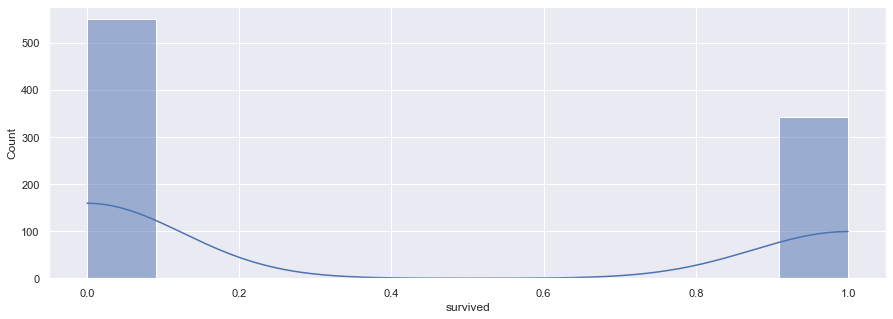

In [39]:
sns.histplot(data=df_numerical['survived'], kde=True)

### 5.2 Histogram and Distribution for pclass

<AxesSubplot:xlabel='pclass', ylabel='Count'>

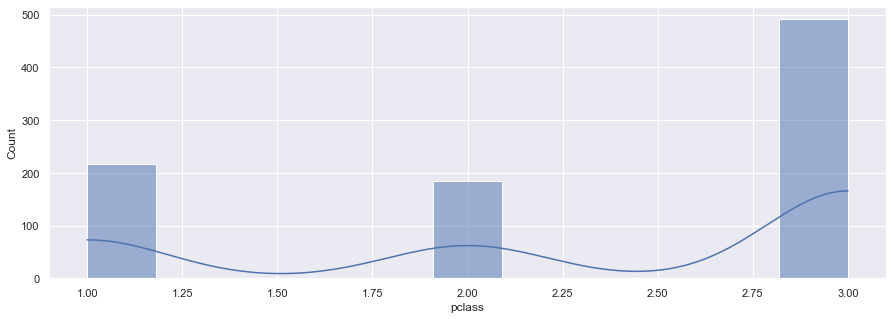

In [40]:
sns.histplot(data=df_numerical['pclass'], kde=True)

### 5.3 Histogram and Distribution for age

<AxesSubplot:xlabel='age', ylabel='Count'>

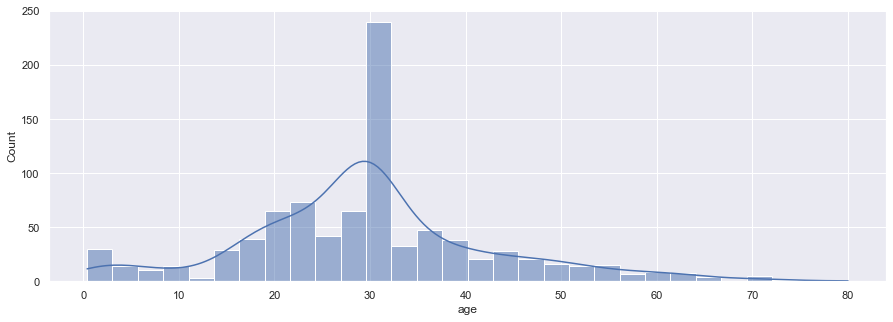

In [41]:
sns.histplot(data=df_numerical['age'], kde=True)

### 5.4 Histogram and Distribution for sibsp

<AxesSubplot:xlabel='sibsp', ylabel='Count'>

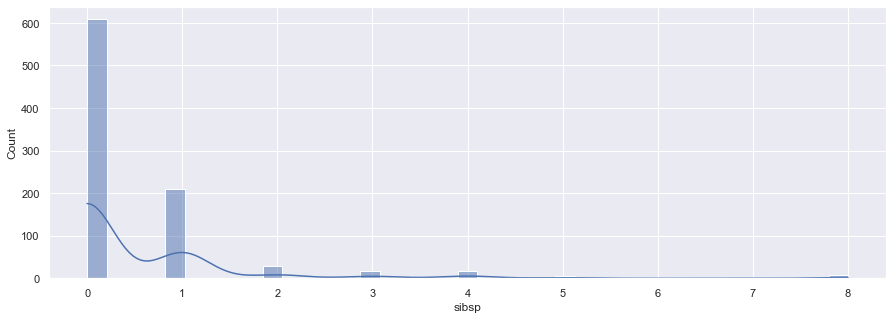

In [42]:
sns.histplot(data=df_numerical['sibsp'], kde=True)

### 5.5 Histogram and Distribution for parch

<AxesSubplot:xlabel='parch', ylabel='Count'>

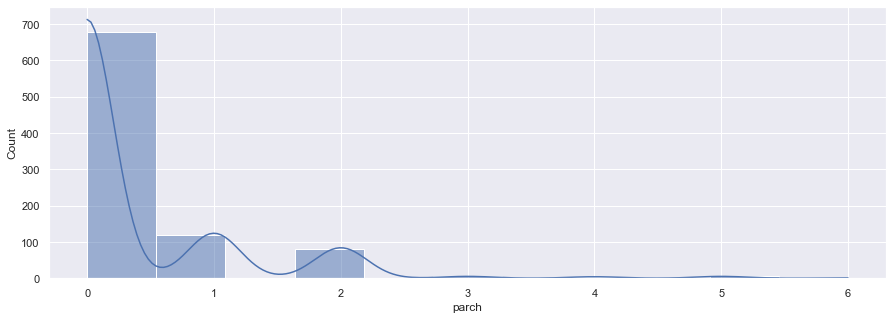

In [43]:
sns.histplot(data=df_numerical['parch'], kde=True)

### 5.6 Histogram and Distribution for fare

<AxesSubplot:xlabel='fare', ylabel='Count'>

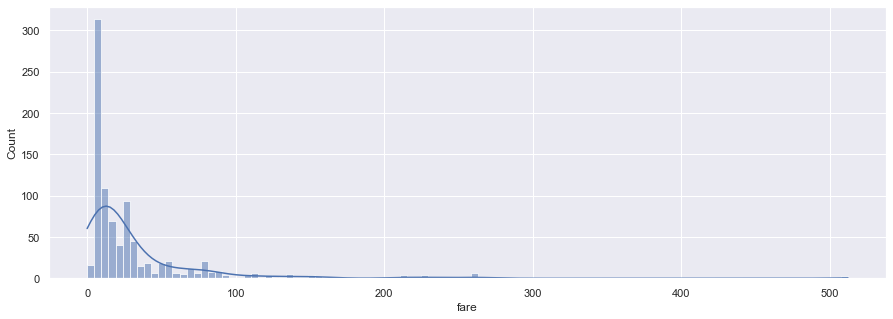

In [44]:
sns.histplot(data=df_numerical['fare'], kde=True)

### 5.7 Histogram and Distribution for class

<AxesSubplot:xlabel='class', ylabel='Count'>

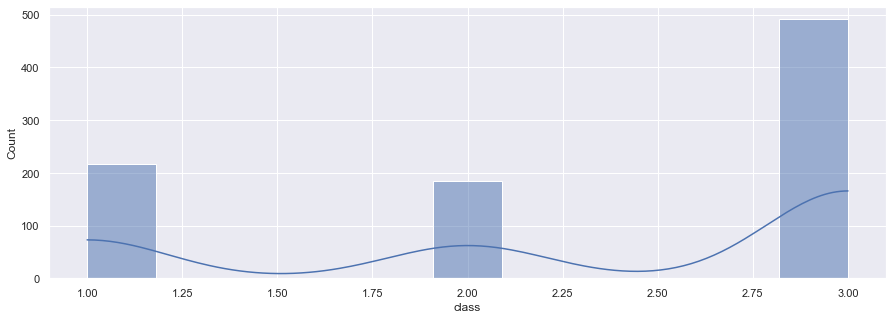

In [45]:
sns.histplot(data=df_numerical['class'], kde=True)

### 5.8 Histogram and Distribution for alone

<AxesSubplot:xlabel='alone', ylabel='Count'>

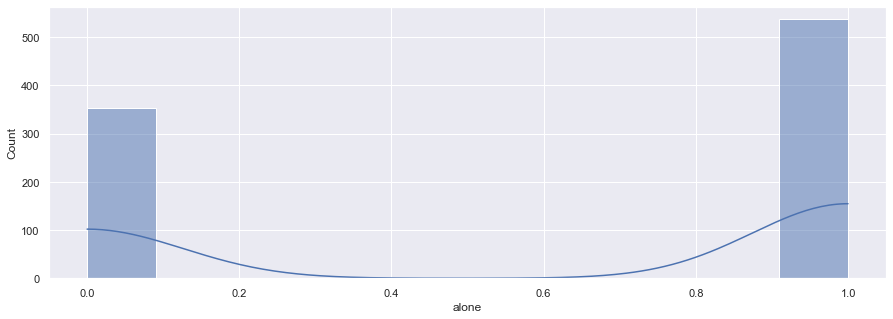

In [46]:
sns.histplot(data=df_numerical['alone'], kde=True)

## 6.0 Standardization

In [47]:
df_numerical.head()

,survived,pclass,age,sibsp,parch,fare,class,alone
0,0,3,22.0,1,0,7.2500,3,0
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,3,1
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,3,1


### 6.1 standardization of dataset

In [48]:
df_standard = (df_numerical - df_numerical.mean())/df_numerical.std()
df_standard.head()

,survived,pclass,age,sibsp,parch,fare,class,alone
0,-0.788829,0.826913,-0.592148,0.432550,-0.473408,-0.502163,0.826913,-1.230954
1,1.266279,-1.565228,0.638430,0.432550,-0.473408,0.786404,-1.565228,-1.230954
2,1.266279,0.826913,-0.284503,-0.474279,-0.473408,-0.488580,0.826913,0.811467
3,1.266279,-1.565228,0.407697,0.432550,-0.473408,0.420494,-1.565228,-1.230954
4,-0.788829,0.826913,0.407697,-0.474279,-0.473408,-0.486064,0.826913,0.811467


### 6.2 mean and standard deviation of standardized dataset 

In [49]:
round(df_standard.mean())

survived    0.0
pclass      0.0
age         0.0
sibsp       0.0
parch      -0.0
fare        0.0
class       0.0
alone       0.0
dtype: float64

In [50]:
df_standard.std()

survived    1.0
pclass      1.0
age         1.0
sibsp       1.0
parch       1.0
fare        1.0
class       1.0
alone       1.0
dtype: float64

### 6.3 kde plot of original dataset

<AxesSubplot:ylabel='Density'>

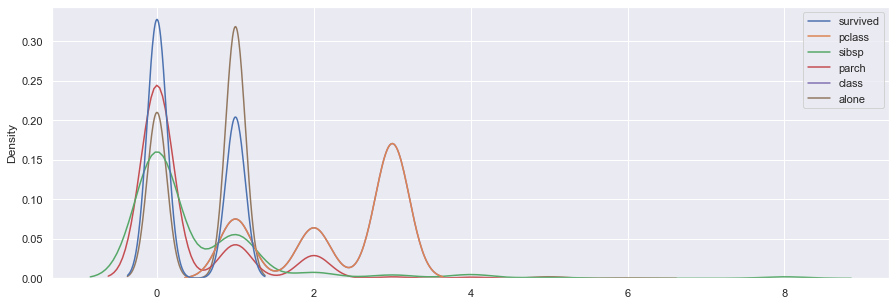

In [51]:
sns.kdeplot(data=df_numerical[['survived', 'pclass', 'sibsp', 'parch', 'class',
       'alone']])

<AxesSubplot:ylabel='Density'>

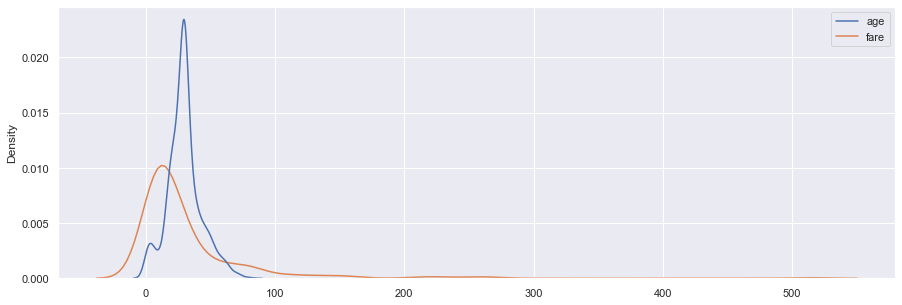

In [52]:
sns.kdeplot(data=df_numerical[['age', 'fare']])

### 6.4 kde plot of standardized dataset

<AxesSubplot:ylabel='Density'>

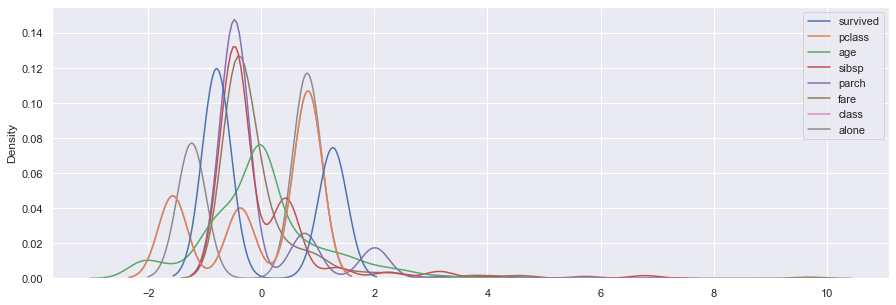

In [53]:
sns.kdeplot(data=df_standard)

## 7.0 Normalization

**Using MinMax Scalar**

**Note: using MinMax Scalar the data range will be 0 to 1.**

In [54]:
df_numerical.head()

,survived,pclass,age,sibsp,parch,fare,class,alone
0,0,3,22.0,1,0,7.2500,3,0
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,3,1
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,3,1


### 7.1 normalization of dataset

In [55]:
df_normal = (df_numerical - df_numerical.min())/(df_numerical.max() - df_numerical.min())
df_normal.head()

,survived,pclass,age,sibsp,parch,fare,class,alone
0,0.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,1.0,1.0
3,1.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0
4,0.0,1.0,0.434531,0.000,0.0,0.015713,1.0,1.0


### 7.2 min, max, mean and standard deviation of normalized dataset 

In [56]:
df_normal.min()

survived    0.0
pclass      0.0
age         0.0
sibsp       0.0
parch       0.0
fare        0.0
class       0.0
alone       0.0
dtype: float64

In [57]:
df_normal.max()

survived    1.0
pclass      1.0
age         1.0
sibsp       1.0
parch       1.0
fare        1.0
class       1.0
alone       1.0
dtype: float64

In [58]:
df_normal.mean()

survived    0.383838
pclass      0.654321
age         0.367921
sibsp       0.065376
parch       0.063599
fare        0.062858
class       0.654321
alone       0.602694
dtype: float64

In [59]:
df_normal.std()

survived    0.486592
pclass      0.418036
age         0.163383
sibsp       0.137843
parch       0.134343
fare        0.096995
class       0.418036
alone       0.489615
dtype: float64

### 7.3 kde plot of original dataset

<AxesSubplot:ylabel='Density'>

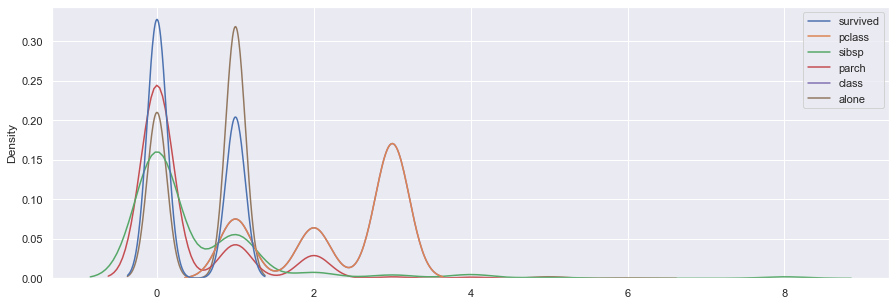

In [60]:
sns.kdeplot(data=df_numerical[['survived', 'pclass', 'sibsp', 'parch', 'class',
       'alone']])

<AxesSubplot:ylabel='Density'>

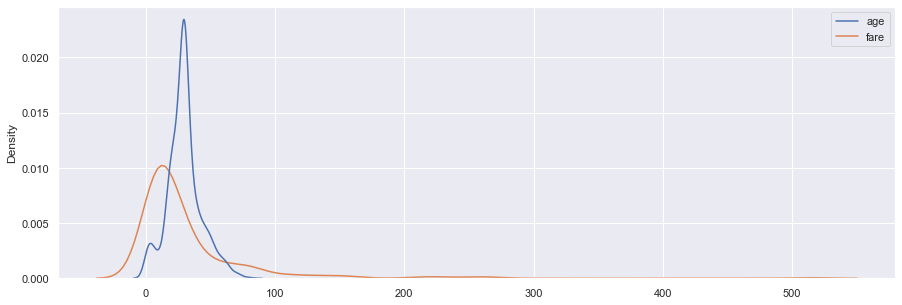

In [61]:
sns.kdeplot(data=df_numerical[['age', 'fare']])

### 7.4 kde plot of normalized dataset

<AxesSubplot:ylabel='Density'>

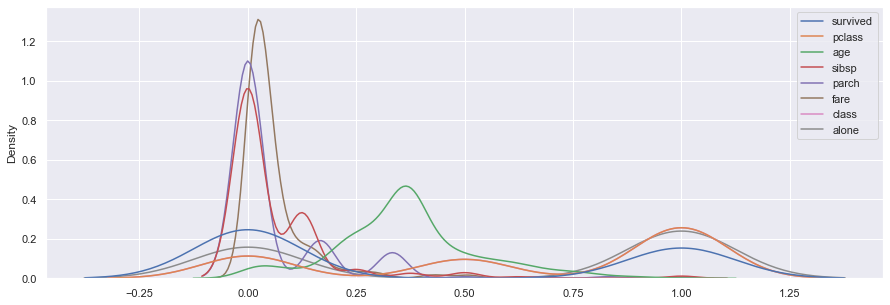

In [62]:
sns.kdeplot(data=df_normal)

# 8.0 Central Limit Theorem 
### The Central Limit Theorem(CLT) states that for any data, provided a high number of samples have been taken. The following properties hold:

1. Sampling Distribution Mean(μₓ¯) = Population Mean(μ)
2. Sampling distribution’s standard deviation (Standard error) = σ/√n ≈S/√n
3. For n > 30, the sampling distribution becomes a normal distribution.

In [63]:
df_numerical.head()

,survived,pclass,age,sibsp,parch,fare,class,alone
0,0,3,22.0,1,0,7.2500,3,0
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,3,1
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,3,1


### 8.1 For survived column

**8.1.1 Population Mean and Standard Deviation**

In [64]:
mean_pop_survived = df_numerical['survived'].mean()
std_pop_survived = df_numerical['survived'].std()

print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_pop_survived,std_pop_survived))

population mean (μ): 0.3838383838383838
population standard deviation (σ): 0.4865924542648585


**8.1.2 histplot**

<AxesSubplot:xlabel='survived', ylabel='Count'>

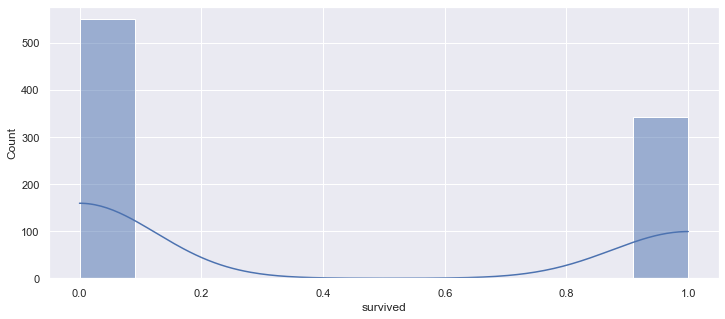

In [65]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_numerical['survived'], kde=True)

**8.1.3 Verifying CLT**

**8.1.3.1 Keeping No. of Samples Constant**

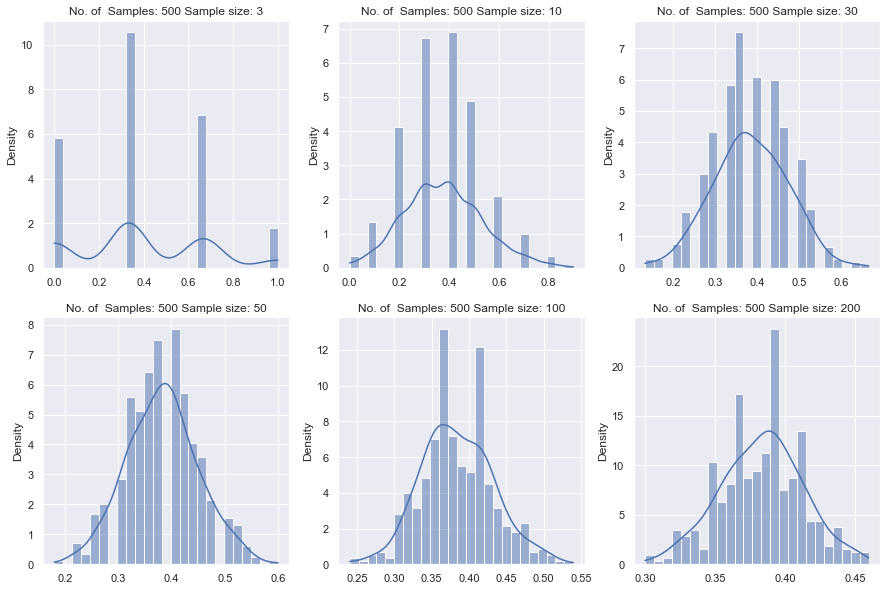

In [66]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []

# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
    sample_means = [df_numerical.survived.sample(samp_size).mean() for i in range(no_of_samples)]
    list_sample_means.append(sample_means)
    plt.subplot(2,3,ind+1)
    sns.histplot(sample_means, bins=25, kde=True, stat="density")
    plt.title("No. of  Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [67]:
for i in list_sample_means:
    print(pd.Series(i).mean())

0.39533333333333365
0.3764000000000005
0.38453333333333495
0.3829199999999996
0.38448000000000004
0.3833299999999997


**8.1.3.2 Keeping Samples Size Constant**

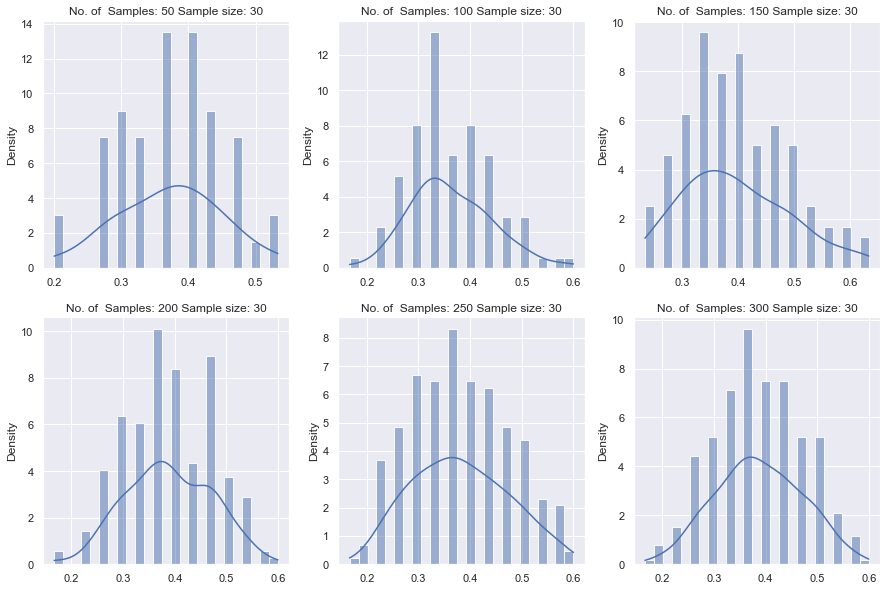

In [68]:
sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []

# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
    sample_means = [df_numerical.survived.sample(samp_size).mean() for i in range(no_of_samples)]
    list_sample_means.append(sample_means)
    plt.subplot(2,3,ind+1)
    sns.histplot(sample_means, bins=25, kde=True, stat="density")
    plt.title("No. of  Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [69]:
for i in list_sample_means:
    print(pd.Series(i).mean())

0.37199999999999994
0.3629999999999999
0.3957777777777777
0.3889999999999996
0.3806666666666662
0.387333333333333


### 8.2 For pclass column

**8.2.1 Population Mean and Standard Deviation**

In [70]:
mean_pop_pclass = df_numerical['pclass'].mean()
std_pop_pclass = df_numerical['pclass'].std()

print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_pop_pclass,std_pop_pclass))

population mean (μ): 2.308641975308642
population standard deviation (σ): 0.8360712409770513


**8.2.2 histplot**

<AxesSubplot:xlabel='pclass', ylabel='Count'>

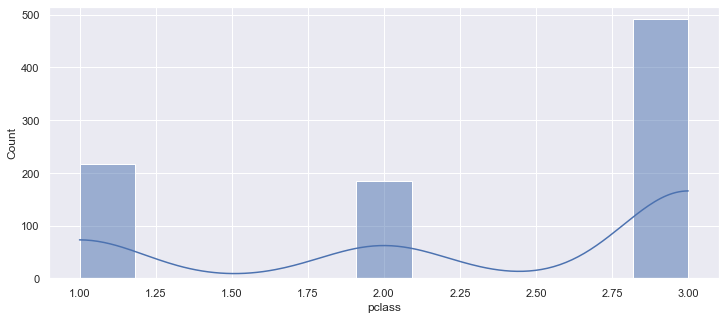

In [71]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_numerical['pclass'], kde=True)

**8.2.3 Verifying CLT**

**8.2.3.1 Keeping No. of Samples Constant**

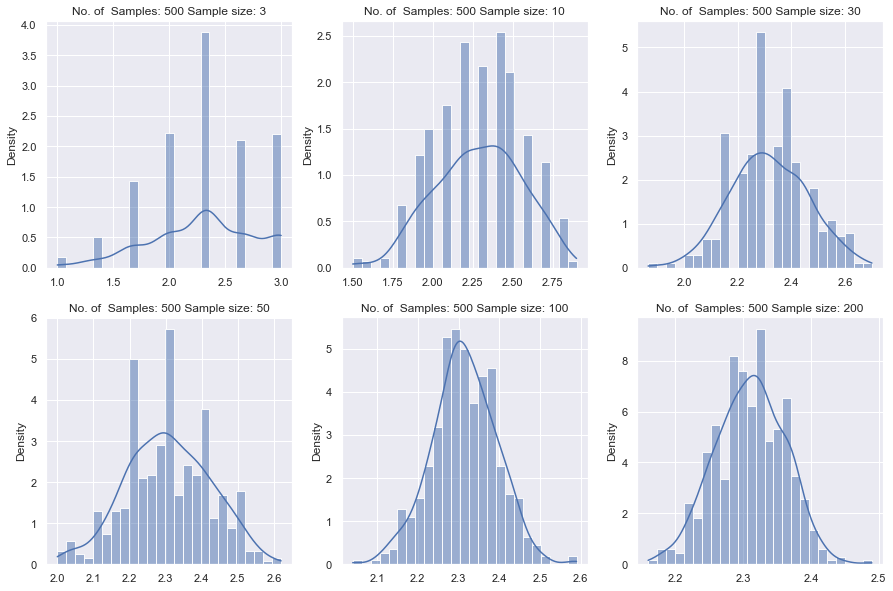

In [72]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []

# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
    sample_means = [df_numerical.pclass.sample(samp_size).mean() for i in range(no_of_samples)]
    list_sample_means.append(sample_means)
    plt.subplot(2,3,ind+1)
    sns.histplot(sample_means, bins=25, kde=True, stat="density")
    plt.title("No. of  Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [73]:
for i in list_sample_means:
    print(pd.Series(i).mean())

2.3126666666666673
2.2889999999999997
2.317133333333333
2.307480000000002
2.3139800000000013
2.3102899999999993


**8.2.3.2 Keeping Samples Size Constant**

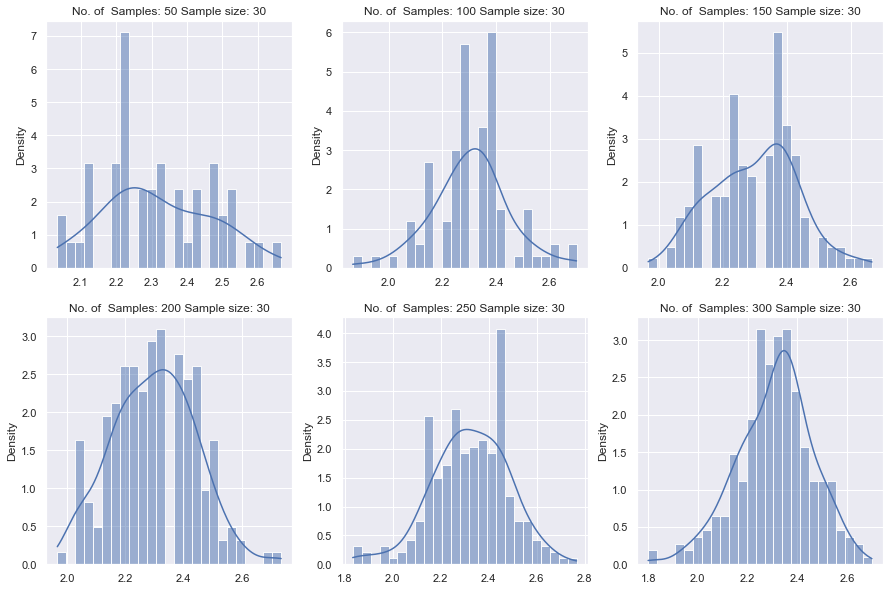

In [74]:
sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []

# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
    sample_means = [df_numerical.pclass.sample(samp_size).mean() for i in range(no_of_samples)]
    list_sample_means.append(sample_means)
    plt.subplot(2,3,ind+1)
    sns.histplot(sample_means, bins=25, kde=True, stat="density")
    plt.title("No. of  Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [75]:
for i in list_sample_means:
    print(pd.Series(i).mean())

2.3160000000000003
2.305666666666667
2.2991111111111113
2.2973333333333352
2.3234666666666675
2.3093333333333326


### 8.3 For age column

**8.3.1 Population Mean and Standard Deviation**

In [76]:
mean_pop_age = df_numerical['age'].mean()
std_pop_age = df_numerical['age'].std()

print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_pop_age,std_pop_age))

population mean (μ): 29.699117647058763
population standard deviation (σ): 13.002015226002884


**8.3.2 histplot**

<AxesSubplot:xlabel='age', ylabel='Count'>

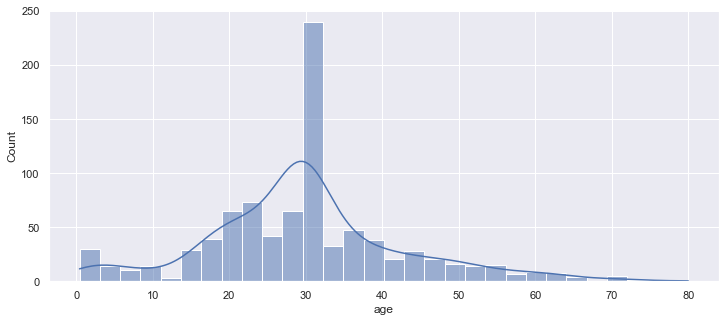

In [77]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_numerical['age'], kde=True)

**8.3.3 Verifying CLT**

**8.3.3.1 Keeping No. of Samples Constant**

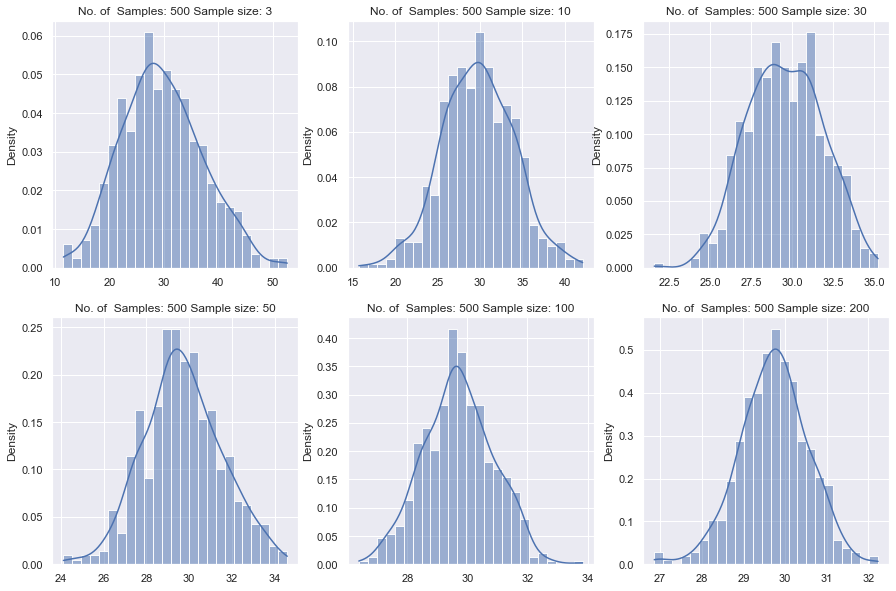

In [78]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []

# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
    sample_means = [df_numerical.age.sample(samp_size).mean() for i in range(no_of_samples)]
    list_sample_means.append(sample_means)
    plt.subplot(2,3,ind+1)
    sns.histplot(sample_means, bins=25, kde=True, stat="density")
    plt.title("No. of  Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [79]:
for i in list_sample_means:
    print(pd.Series(i).mean())

29.69878470588234
29.769287529411752
29.55361864705884
29.70903081176472
29.706830994117645
29.727918614705917


**8.3.3.2 Keeping Samples Size Constant**

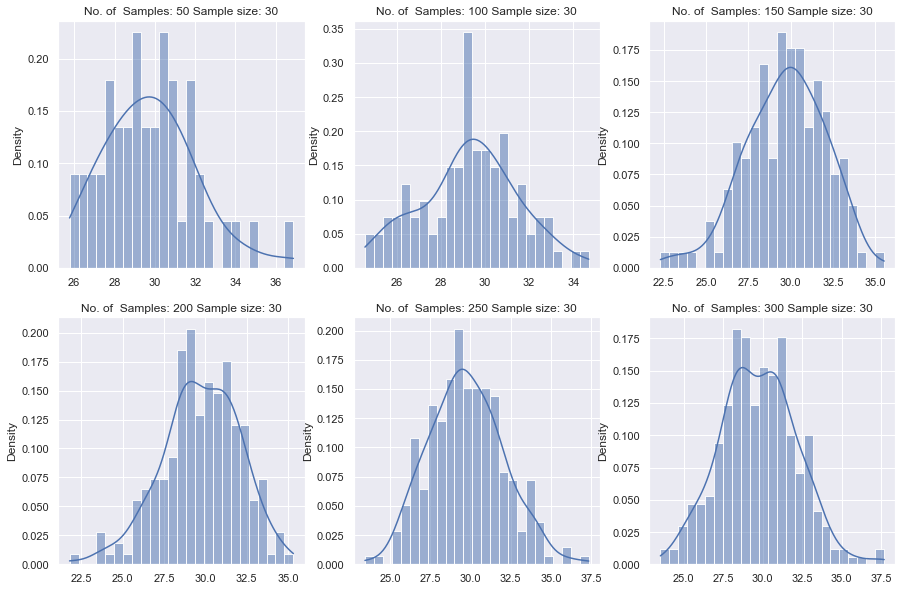

In [80]:
sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []

# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
    sample_means = [df_numerical.age.sample(samp_size).mean() for i in range(no_of_samples)]
    list_sample_means.append(sample_means)
    plt.subplot(2,3,ind+1)
    sns.histplot(sample_means, bins=25, kde=True, stat="density")
    plt.title("No. of  Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [81]:
for i in list_sample_means:
    print(pd.Series(i).mean())

29.78369960784314
29.288837549019615
29.67308490196079
29.72250710784313
29.74254800000001
29.73089205882354


### 8.4 For sibsp column

**8.4.1 Population Mean and Standard Deviation**

In [82]:
mean_pop_sibsp = df_numerical['sibsp'].mean()
std_pop_sibsp = df_numerical['sibsp'].std()

print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_pop_sibsp,std_pop_sibsp))

population mean (μ): 0.5230078563411896
population standard deviation (σ): 1.1027434322934275


**8.4.2 histplot**

<AxesSubplot:xlabel='sibsp', ylabel='Count'>

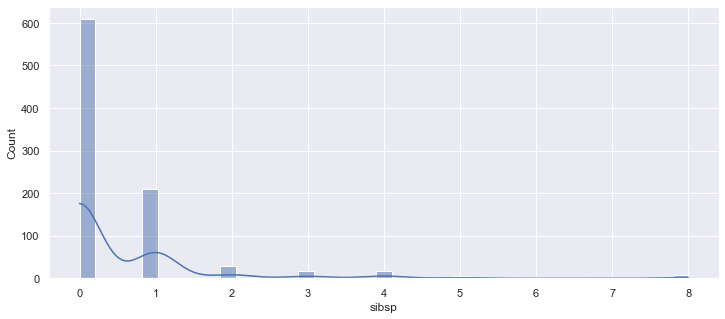

In [83]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_numerical['sibsp'], kde=True)

**8.4.3 Verifying CLT**

**8.4.3.1 Keeping No. of Samples Constant**

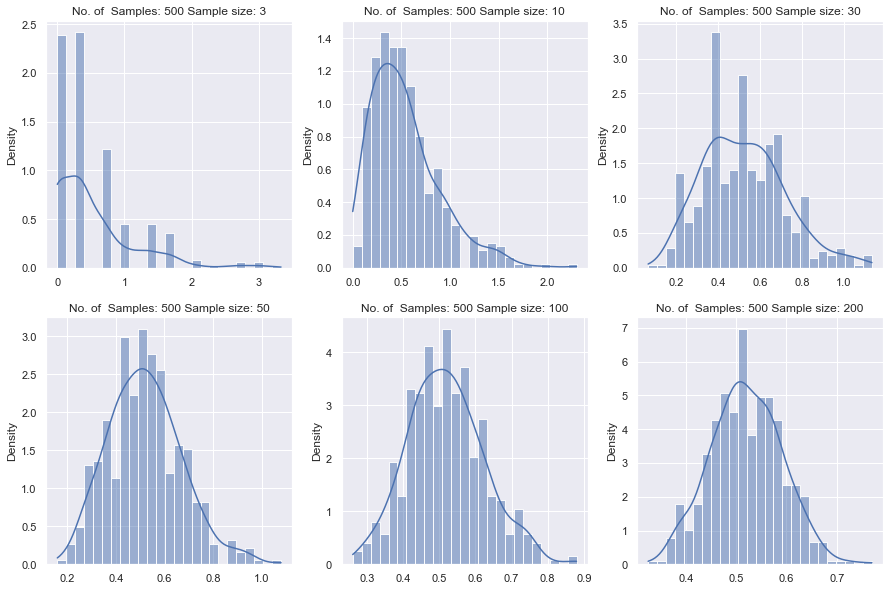

In [84]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []

# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
    sample_means = [df_numerical.sibsp.sample(samp_size).mean() for i in range(no_of_samples)]
    list_sample_means.append(sample_means)
    plt.subplot(2,3,ind+1)
    sns.histplot(sample_means, bins=25, kde=True, stat="density")
    plt.title("No. of  Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [85]:
for i in list_sample_means:
    print(pd.Series(i).mean())

0.5120000000000007
0.5385999999999996
0.5217333333333332
0.5204
0.5182400000000001
0.5199900000000001


**8.4.3.2 Keeping Samples Size Constant**

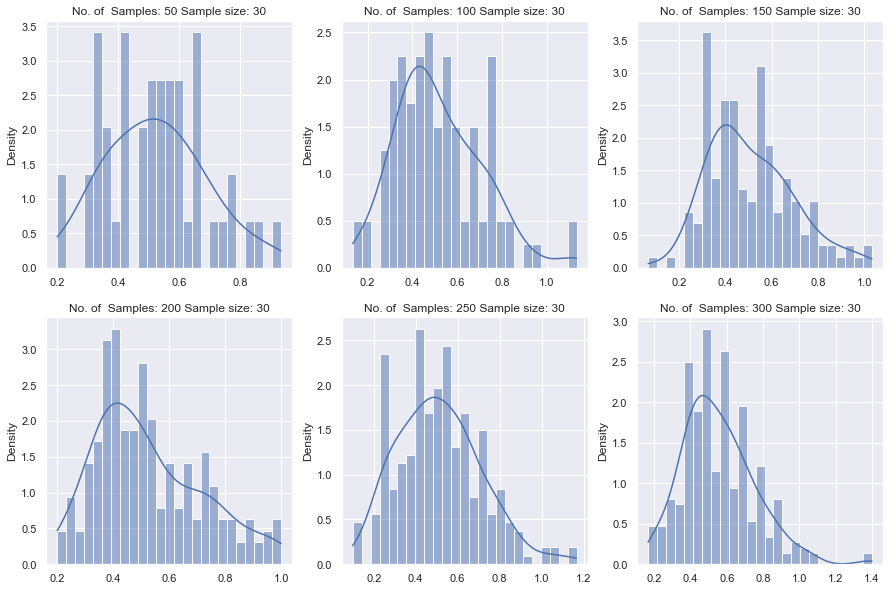

In [86]:
sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []

# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
    sample_means = [df_numerical.sibsp.sample(samp_size).mean() for i in range(no_of_samples)]
    list_sample_means.append(sample_means)
    plt.subplot(2,3,ind+1)
    sns.histplot(sample_means, bins=25, kde=True, stat="density")
    plt.title("No. of  Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [87]:
for i in list_sample_means:
    print(pd.Series(i).mean())

0.5220000000000001
0.5166666666666666
0.5075555555555556
0.525833333333333
0.5121333333333336
0.5541111111111114


### 8.5 For parch column

**8.5.1 Population Mean and Standard Deviation**

In [88]:
mean_pop_parch = df_numerical['parch'].mean()
std_pop_parch = df_numerical['parch'].std()

print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_pop_parch,std_pop_parch))

population mean (μ): 0.38159371492704824
population standard deviation (σ): 0.8060572211299559


**8.5.2 histplot**

<AxesSubplot:xlabel='parch', ylabel='Count'>

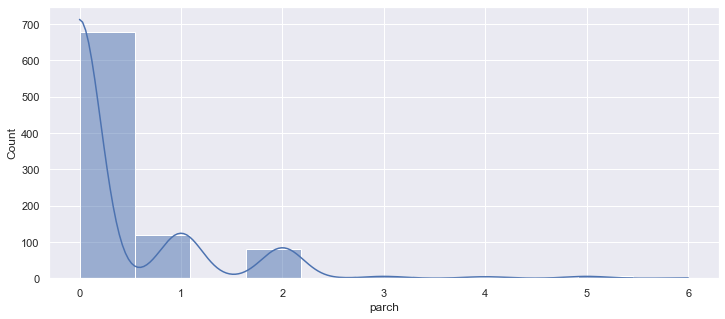

In [89]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_numerical['parch'], kde=True)

**8.5.3 Verifying CLT**

**8.5.3.1 Keeping No. of Samples Constant**

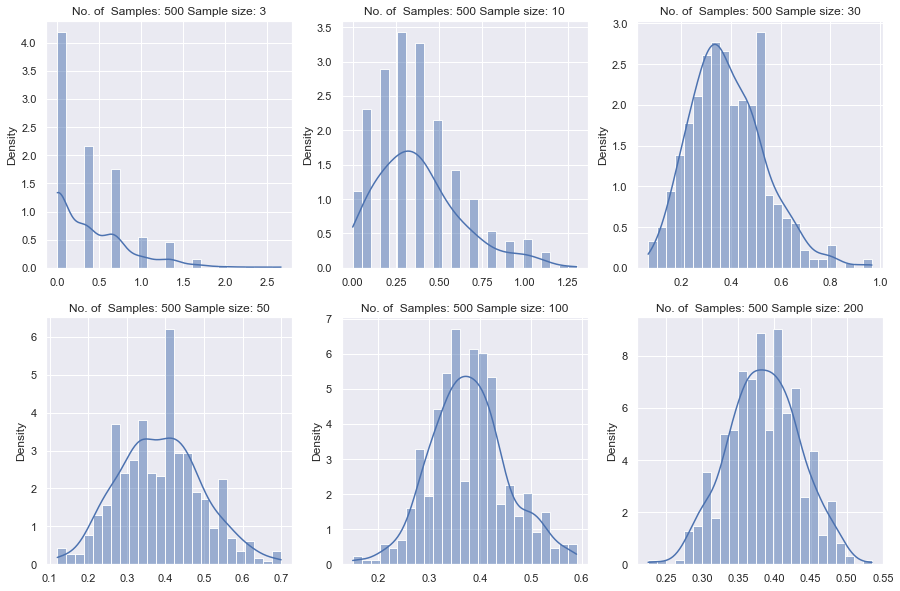

In [90]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []

# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
    sample_means = [df_numerical.parch.sample(samp_size).mean() for i in range(no_of_samples)]
    list_sample_means.append(sample_means)
    plt.subplot(2,3,ind+1)
    sns.histplot(sample_means, bins=25, kde=True, stat="density")
    plt.title("No. of  Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [91]:
for i in list_sample_means:
    print(pd.Series(i).mean())

0.3826666666666669
0.3807999999999998
0.38606666666666717
0.38652000000000014
0.3790400000000001
0.38513000000000003


**8.5.3.2 Keeping Samples Size Constant**

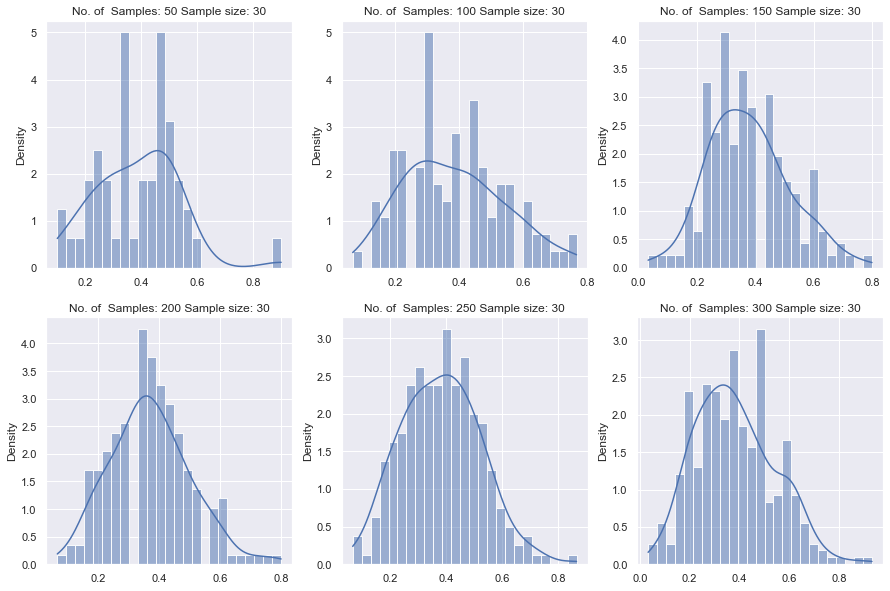

In [92]:
sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []

# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
    sample_means = [df_numerical.parch.sample(samp_size).mean() for i in range(no_of_samples)]
    list_sample_means.append(sample_means)
    plt.subplot(2,3,ind+1)
    sns.histplot(sample_means, bins=25, kde=True, stat="density")
    plt.title("No. of  Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [93]:
for i in list_sample_means:
    print(pd.Series(i).mean())

0.38266666666666665
0.38366666666666666
0.37799999999999984
0.37150000000000005
0.38173333333333326
0.3820000000000001


### 8.6 for fare column

**8.6.1 Population Mean and Standard Deviation**

In [94]:
mean_pop_fare = df_numerical['fare'].mean()
std_pop_fare = df_numerical['fare'].std()

print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_pop_fare,std_pop_fare))

population mean (μ): 32.2042079685746
population standard deviation (σ): 49.693428597180905


**8.6.2 histplot**

<AxesSubplot:xlabel='fare', ylabel='Count'>

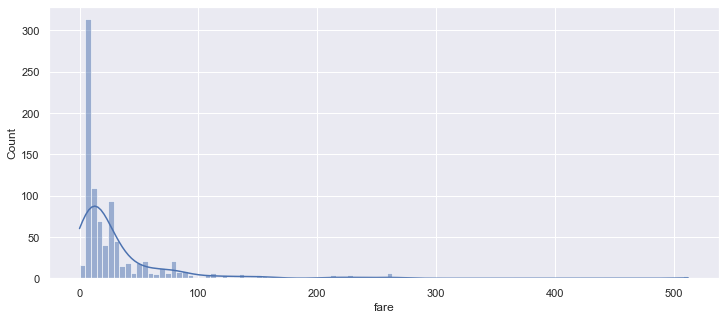

In [95]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_numerical['fare'], kde=True)

**8.6.3 Verifying CLT**

**8.6.3.1 Keeping No. of Samples Constant**

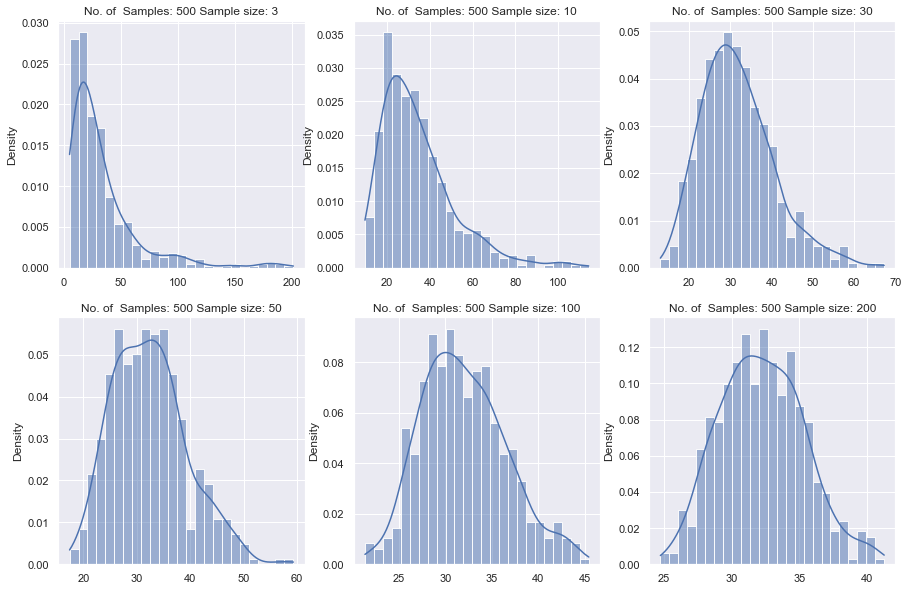

In [96]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []

# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
    sample_means = [df_numerical.fare.sample(samp_size).mean() for i in range(no_of_samples)]
    list_sample_means.append(sample_means)
    plt.subplot(2,3,ind+1)
    sns.histplot(sample_means, bins=25, kde=True, stat="density")
    plt.title("No. of  Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [97]:
for i in list_sample_means:
    print(pd.Series(i).mean())

33.35012126666668
34.36131836
31.79249861333334
32.380845784
31.987553916000003
32.25655779400001


**8.6.3.2 Keeping Samples Size Constant**

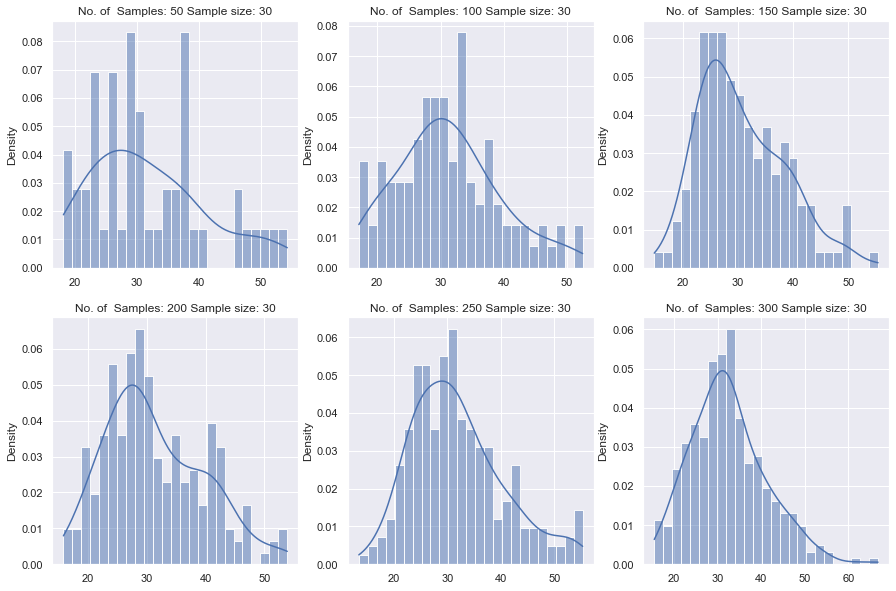

In [98]:
sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []

# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
    sample_means = [df_numerical.fare.sample(samp_size).mean() for i in range(no_of_samples)]
    list_sample_means.append(sample_means)
    plt.subplot(2,3,ind+1)
    sns.histplot(sample_means, bins=25, kde=True, stat="density")
    plt.title("No. of  Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [99]:
for i in list_sample_means:
    print(pd.Series(i).mean())

31.88882433333333
31.191078400000006
30.595055244444442
31.29943943333334
31.861126759999998
32.46116101111112


### 8.7 for class column

**8.7.1 Population Mean and Standard Deviation**

In [100]:
mean_pop_class = df_numerical['class'].mean()
std_pop_class = df_numerical['class'].std()

print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_pop_class,std_pop_class))

population mean (μ): 2.308641975308642
population standard deviation (σ): 0.8360712409770513


**8.7.2 histplot**

<AxesSubplot:xlabel='class', ylabel='Count'>

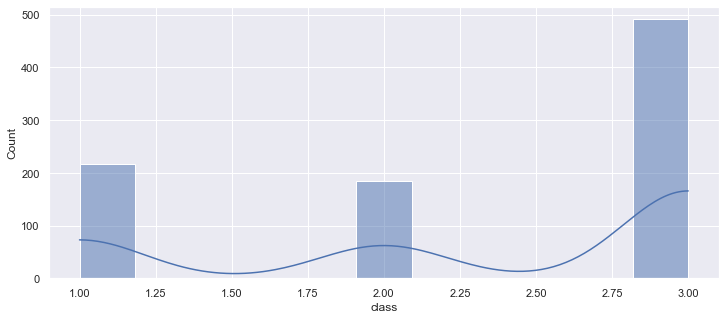

In [101]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_numerical['class'], kde=True)

**8.7.3 Verifying CLT**

**8.7.3.1 Keeping No. of Samples Constant**

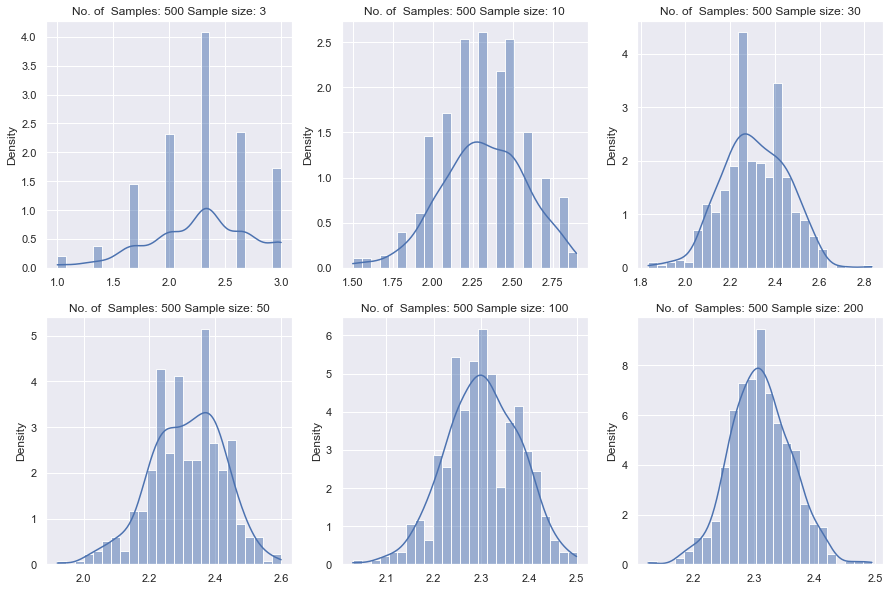

In [102]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []

# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
    sample_means = [df_numerical['class'].sample(samp_size).mean() for i in range(no_of_samples)]
    list_sample_means.append(sample_means)
    plt.subplot(2,3,ind+1)
    sns.histplot(sample_means, bins=25, kde=True, stat="density")
    plt.title("No. of  Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [103]:
for i in list_sample_means:
    print(pd.Series(i).mean())

2.2973333333333326
2.319800000000001
2.308933333333334
2.31328
2.302799999999998
2.3109400000000004


**8.7.3.2 Keeping Samples Size Constant**

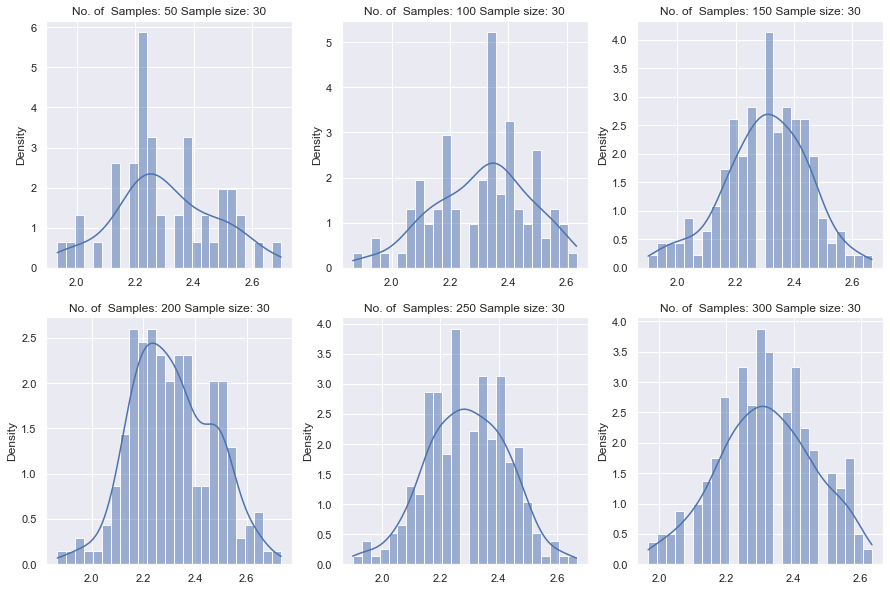

In [104]:
sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []

# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
    sample_means = [df_numerical['class'].sample(samp_size).mean() for i in range(no_of_samples)]
    list_sample_means.append(sample_means)
    plt.subplot(2,3,ind+1)
    sns.histplot(sample_means, bins=25, kde=True, stat="density")
    plt.title("No. of  Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [105]:
for i in list_sample_means:
    print(pd.Series(i).mean())

2.3026666666666666
2.310666666666667
2.301111111111111
2.311833333333334
2.2906666666666653
2.3175555555555567


### 8.8 for alone column

**8.8.1 Population Mean and Standard Deviation**

In [106]:
mean_pop_alone = df_numerical['alone'].mean()
std_pop_alone = df_numerical['alone'].std()

print("population mean (μ): {}\npopulation standard deviation (σ): {}".format(mean_pop_alone,std_pop_alone))

population mean (μ): 0.6026936026936027
population standard deviation (σ): 0.4896152299826277


**8.8.2 histplot**

<AxesSubplot:xlabel='alone', ylabel='Count'>

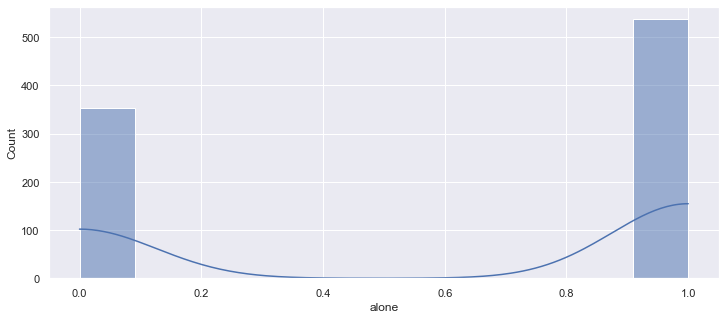

In [107]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_numerical['alone'], kde=True)

**8.8.3 Verifying CLT**

**8.8.3.1 Keeping No. of Samples Constant**

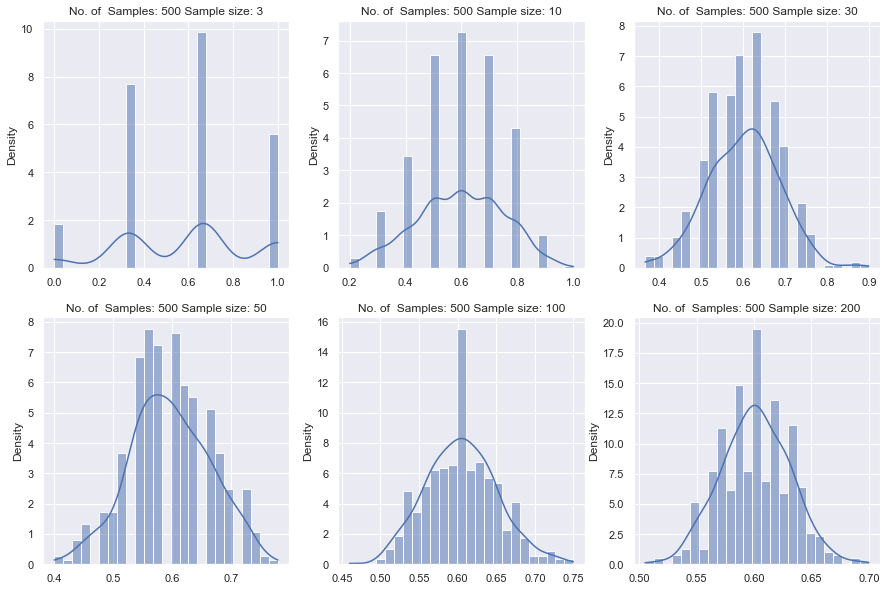

In [108]:
sample_sizes = [(500,3), (500,10), (500,30), (500,50), (500,100), (500,200)]
list_sample_means = []

# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
    sample_means = [df_numerical.alone.sample(samp_size).mean() for i in range(no_of_samples)]
    list_sample_means.append(sample_means)
    plt.subplot(2,3,ind+1)
    sns.histplot(sample_means, bins=25, kde=True, stat="density")
    plt.title("No. of  Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [109]:
for i in list_sample_means:
    print(pd.Series(i).mean())

0.5893333333333332
0.5951999999999997
0.6022666666666646
0.5966800000000007
0.6049999999999999
0.6011300000000002


**8.8.3.2 Keeping Samples Size Constant**

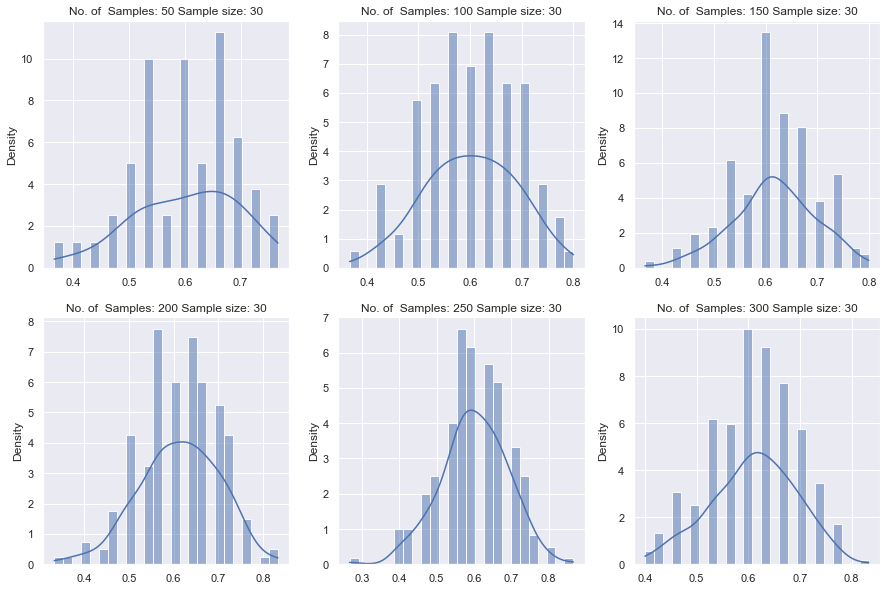

In [110]:
sample_sizes = [(50,30), (100,30), (150,30), (200,30), (250,30), (300,30)]
list_sample_means = []

# Plotting the distribution graphs for the above created Samples
plt.figure(figsize=[15,10])
for ind, (no_of_samples,samp_size) in enumerate(sample_sizes):
    sample_means = [df_numerical.alone.sample(samp_size).mean() for i in range(no_of_samples)]
    list_sample_means.append(sample_means)
    plt.subplot(2,3,ind+1)
    sns.histplot(sample_means, bins=25, kde=True, stat="density")
    plt.title("No. of  Samples: "+str(no_of_samples) + " Sample size: "+str(samp_size))

In [111]:
for i in list_sample_means:
    print(pd.Series(i).mean())

0.6020000000000002
0.6013333333333338
0.6166666666666669
0.6133333333333337
0.6013333333333327
0.6101111111111099


## 9.0 Covariance,  Pearson correlation coefficient, Spearman's rank correlation coefficient

### 9.1 Covarience

In [112]:
df_numerical.cov()

,survived,pclass,age,sibsp,parch,fare,class,alone
survived,0.236772,-0.137703,-0.441656,-0.018954,0.032017,6.221787,-0.137703,-0.048451
pclass,-0.137703,0.699015,-3.601855,0.076599,0.012429,-22.830196,0.699015,0.055347
age,-0.441656,-3.601855,169.052400,-3.335345,-1.877987,59.162200,-3.601855,1.144445
sibsp,-0.018954,0.076599,-3.335345,1.216043,0.368739,8.748734,0.076599,-0.315568
parch,0.032017,0.012429,-1.877987,0.368739,0.649728,8.661052,0.012429,-0.230242
fare,6.221787,-22.830196,59.162200,8.748734,8.661052,2469.436846,-22.830196,-6.613861
class,-0.137703,0.699015,-3.601855,0.076599,0.012429,-22.830196,0.699015,0.055347
alone,-0.048451,0.055347,1.144445,-0.315568,-0.230242,-6.613861,0.055347,0.239723


### 9.2  Pearson correlation coefficient

In [113]:
df_numerical.corr("pearson")

,survived,pclass,age,sibsp,parch,fare,class,alone
survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.338481,-0.203367
pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,1.000000,0.135207
age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.331339,0.179775
sibsp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.083081,-0.584471
parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.018443,-0.583398
fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.549500,-0.271832
class,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,1.000000,0.135207
alone,-0.203367,0.135207,0.179775,-0.584471,-0.583398,-0.271832,0.135207,1.000000


### 9.3 Spearman's rank correlation coefficient

In [114]:
df_numerical.corr("spearman")

,survived,pclass,age,sibsp,parch,fare,class,alone
survived,1.000000,-0.339668,-0.039109,0.088879,0.138266,0.323736,-0.339668,-0.203367
pclass,-0.339668,1.000000,-0.308875,-0.043019,-0.022801,-0.688032,1.000000,0.135896
age,-0.039109,-0.308875,1.000000,-0.147035,-0.217290,0.118847,-0.308875,0.141379
sibsp,0.088879,-0.043019,-0.147035,1.000000,0.450014,0.447113,-0.043019,-0.828215
parch,0.138266,-0.022801,-0.217290,0.450014,1.000000,0.410074,-0.022801,-0.683719
fare,0.323736,-0.688032,0.118847,0.447113,0.410074,1.000000,-0.688032,-0.531472
class,-0.339668,1.000000,-0.308875,-0.043019,-0.022801,-0.688032,1.000000,0.135896
alone,-0.203367,0.135896,0.141379,-0.828215,-0.683719,-0.531472,0.135896,1.000000


### 9.4 Pairplot for titanic dataset

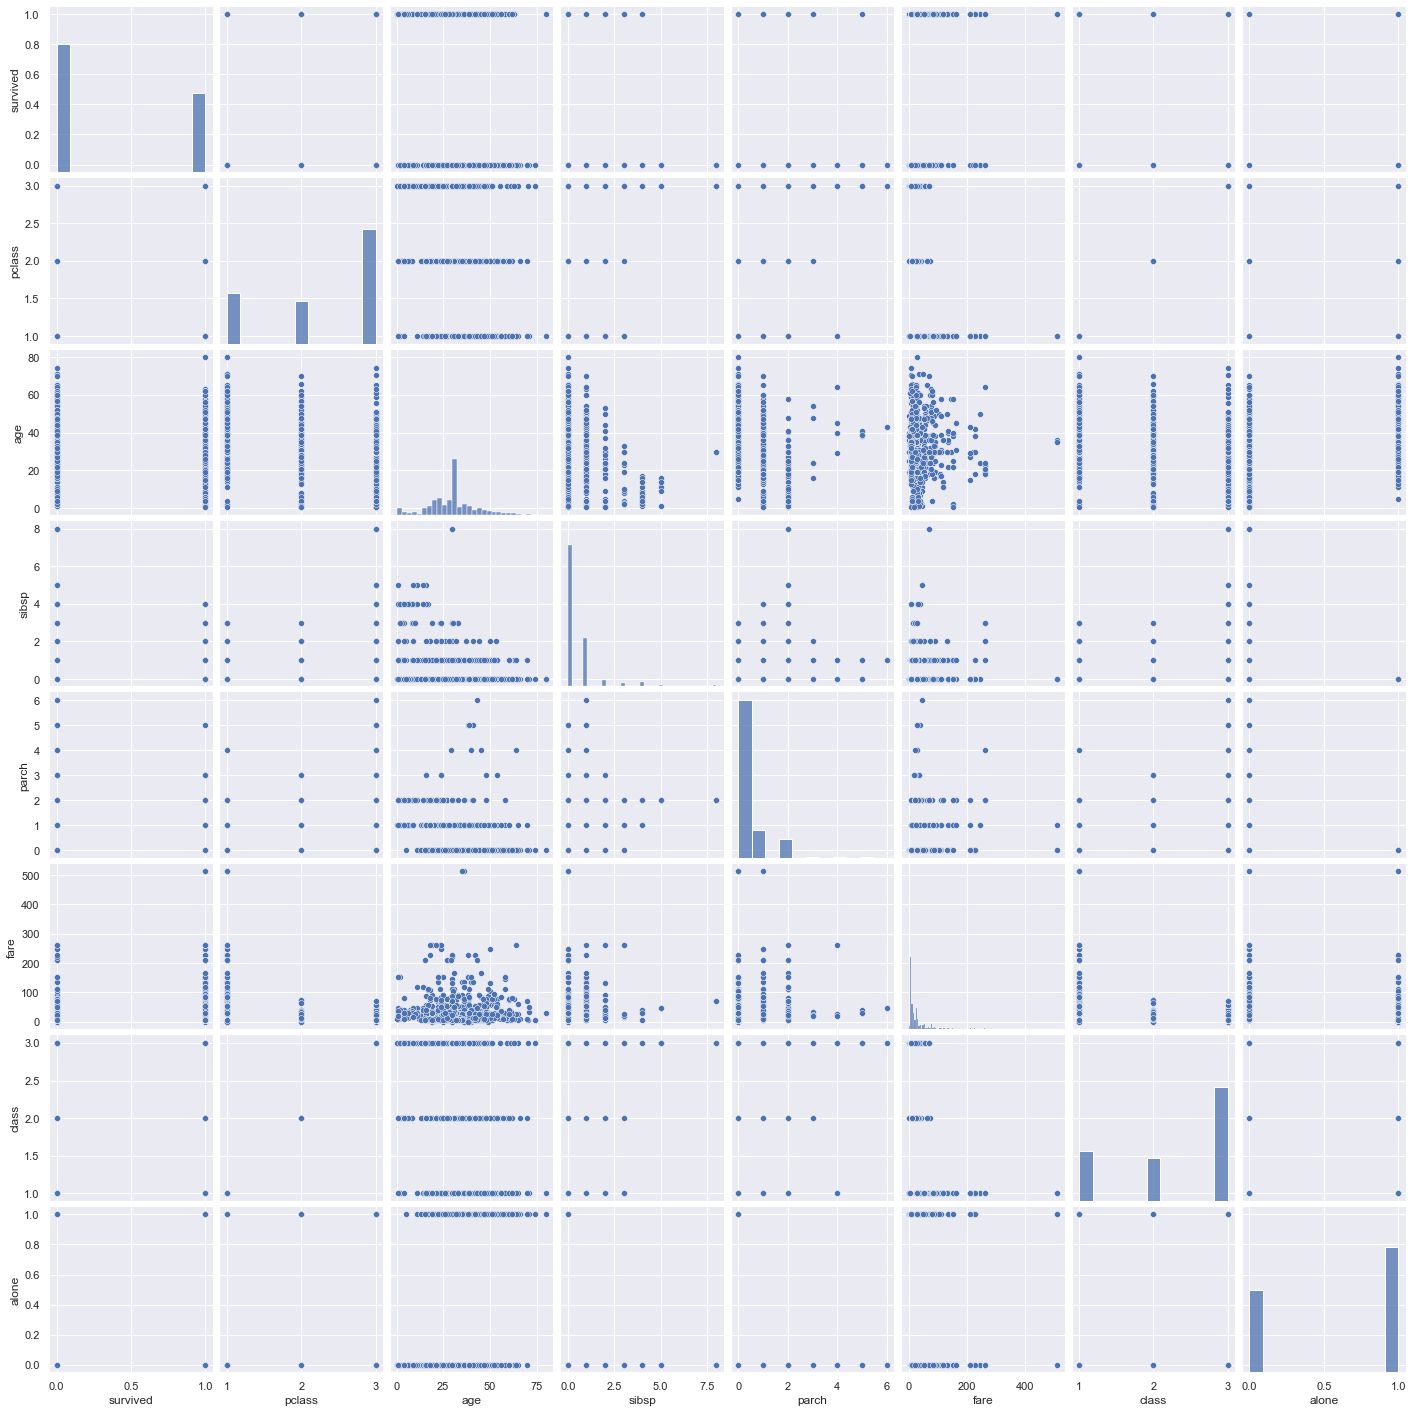

In [115]:
sns.set(rc={'figure.figsize':(25,25)})
sns.pairplot(df_numerical, height=2.5)

### 9.5 Pairplot for titanic dataset with kde

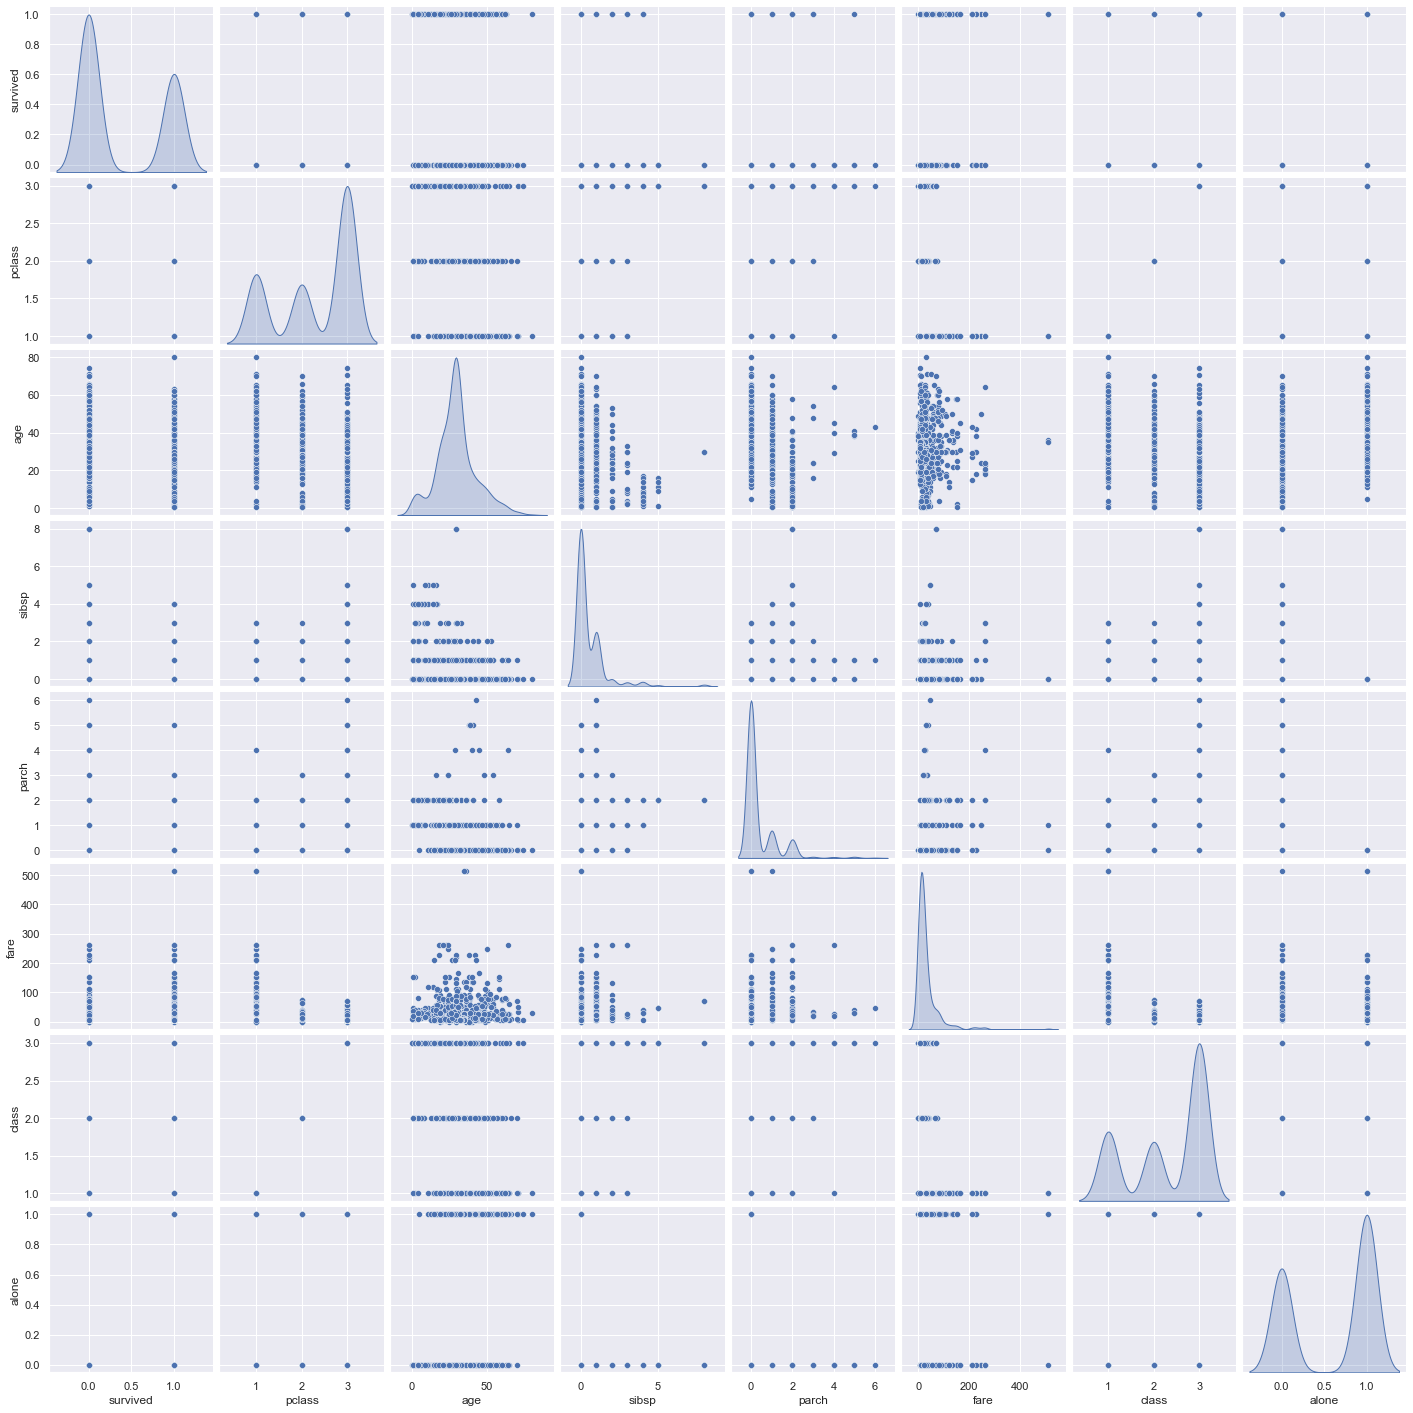

In [116]:
sns.set(rc={'figure.figsize':(25,25)})
sns.pairplot(df_numerical, height=2.5,diag_kind="kde")

# 10.0 Hypothesis testing

### 10.1 z-Test

In [120]:
df_numerical.head()

,survived,pclass,age,sibsp,parch,fare,class,alone
0,0,3,22.0,1,0,7.2500,3,0
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,3,1
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,3,1


In [128]:
# population mean
pop_mean_fare=df_numerical['fare'].mean()
pop_mean_fare

32.2042079685746

In [129]:
# population standard deviation 
pop_std_fare=df_numerical['fare'].std()
pop_std_fare

49.693428597180905

In [137]:
import random
import math

In [159]:
# sampling data and calculating sample mean and standard deviation
random.seed(77)
sample_fare=pd.Series(random.sample(list(df_numerical['fare']), 80))
sample_mean_fare=sample_fare.mean()
sample_mean_fare

37.59453124999999

In [160]:
sample_std_fare=sample_fare.std()
sample_std_fare

66.25722719381305

**Question #1**

For titanic dataset, the mean of fare is given above(32.2042079685746). A survey is  conducted to check the accuracy 
of fares, randomly 80 samples were taken and its mean was found out to be 37.761250000000004.
1. State null and alternate hypothesis
2. with Confidence interval of 95%, Is there is enough evidence to reject the null hypothesis.

**Ans:**

**Step1: Stating Hypothesis**

1. Ho = The mean of the fare is accurate.

2. h1 = The mean of the fare is not accurate.

The problem is related to two tailed test.

**Step2: Decision Boundary**

In [197]:
CI = 0.95
alpha = 0.05
decision_boundary_lower_fare= -1.96 # from z table for alpha = 0.025, since two tailed test
decision_boundary_upper_fare= 1.96

**Step3: Test Statistic** 

In [161]:
z_statistic_fare = (sample_mean_fare-pop_mean_fare)/(pop_std_fare/math.sqrt(80))
z_statistic_fare

0.9701990478999204

In [201]:
def Hypothesis_checker(db_upper, db_lower, test_statistic):
    if test_statistic > db_lower and test_statistic < db_upper:
        return "Null Hypothesis cannot be rejected"
    else:
        return "Null Hypothesis is rejected"

**Step4: Conclusions**

In [203]:
Hypothesis_checker(decision_boundary_upper_fare,decision_boundary_lower_fare,z_statistic_fare)

'Null Hypothesis cannot be rejected'

### 10.2 t-Test

In [194]:
# sampling data and calculating sample mean and standard deviation
random.seed(7)
sample_fare1=pd.Series(random.sample(list(df_numerical['fare']), 25))
sample_mean_fare1=sample_fare.mean()
sample_mean_fare1

37.59453124999999

In [196]:
sample_std_fare1=sample_fare.std()
sample_std_fare1

66.25722719381305

**Question #2**

For titanic dataset, the mean of fare is given above(32.2042079685746). A survey is  conducted to check the accuracy 
of fares, randomly 25 samples were taken and its mean was found out to be 37.59453124999999 and standard deviation is 
66.25722719381305.
1. State null and alternate hypothesis
2. with Confidence interval of 95%, Is there is enough evidence to reject the null hypothesis.

**Ans:**
1. since n<30 and sample standard deviation is given, hence using t-Test. It is two tailed test.

**Step1: Stating Hypothesis**

1. Ho = The mean of the fare is accurate.

2. h1 = The mean of the fare is not accurate.

The problem is related to two tailed test.

**Step2: Decision Boundary**

In [249]:
total_sample_size_fare1 = 25
CI = 0.95
alpha = 0.05
dof_t = 24 # degree of freedom is no of samples minus one.
decision_boundary_lower_fare1= -2.064 # from t table for alpha = 0.025 (since two tailed test) and dof = 24.
decision_boundary_upper_fare1= 2.064

**Step3: Test Statistic** 

In [251]:
t_statistic_fare1 = (sample_mean_fare1-pop_mean_fare)/(sample_std_fare1/math.sqrt(total_sample_size_fare1))
t_statistic_fare1

0.40677247673358147

**Step4: Conclusions**

In [252]:
Hypothesis_checker(decision_boundary_upper_fare1,decision_boundary_lower_fare1,t_statistic_fare1)

'Null Hypothesis cannot be rejected'

### 10.3 z-Test with Proportions

In [154]:
# counting third class passenger
count_third_class=df_numerical[df_numerical['pclass'] == 3]['pclass'].count()
count_third_class

491

In [148]:
# counting total passenger
population_count = df_numerical['pclass'].count()
population_count

891

In [156]:
# calculating percentage of third class passenger
percent_third_class= count_third_class/population_count
percent_third_class

0.5510662177328844

In [171]:
# sampling data and calculating sample mean and standard deviation
random.seed(89)
sample_pclass=pd.Series(random.sample(list(df['pclass']), 300))
count_third_sample= 0
for i in sample_pclass:
    if i == 3:
        count_third_sample += 1
count_third_sample    

154

**Question #3**

For titanic dataset, it is belived that arount 55 percent passangers travelled in third class. A survey is conducted to check this fact, randomly 300 samples were taken and it was found that 154 passengers travelled by third class.

1. State null and alternate hypothesis
2. with Confidence interval of 95%, Is there is enough evidence to reject the null hypothesis.

**Ans:**

In [174]:
total_sample_count_third_class = 300
Po = percent_third_class #i.e 55 percent, null hypothesis value
Po

0.5510662177328844

In [176]:
# observed value
P= count_third_sample/total_sample_count_third_class
P

0.5133333333333333

**Step1: Stating Hypothesis**

1. Ho = Passengers travelled by third class is equal to 55 percent

2. h1 = Passengers travelled by third class is not equal to 55 percent

The problem is related to two tailed test.

**Step2: Decision Boundary**

In [177]:
CI = 0.95
alpha = 0.05
decision_boundary_lower_pclass= -1.96 # from z table for alpha = 0.025, since two tailed test
decision_boundary_upper_pclass= 1.96

**Step3: Test Statistic**

In [178]:
z_statistic_pclass = (P-Po)/math.sqrt(Po*(1-Po)/total_sample_count_third_class)
z_statistic_pclass

-1.313976489852826

**Step4: Conclusion**

In [206]:
Hypothesis_checker(decision_boundary_upper_pclass,decision_boundary_lower_pclass,z_statistic_pclass)

'Null Hypothesis cannot be rejected'

### 10.4 Chi-Square test

In [229]:
# class wise passenger percentage
data_expected = {'First_class_percent': [24], 'Second_class_percent': [21], 'Third_class_percent': [55]}

In [236]:
# data is given in percentage
df_pclass_expected = pd.DataFrame(data = data_expected)

In [234]:
# sampling data and calculating passenger count class-wise
random.seed(101)
sample_pclass_chi_square=pd.Series(random.sample(list(df['pclass']), 500))

In [232]:
 data_sample = {'First_class_count': [129], 'Second_class_count': [102], 'Third_class_count': [269]}

In [235]:
df_pclass_sample = pd.DataFrame(data = data_sample)

**Question #4**

For titanic incident, after the sinking of ship passengers were sorted based on class and same is given in table #1 below.
after some time a study was conducted to cross verify this data and sample of 500 records was taken and its observation is given in table #2 below.
1. State null and alternate hypothesis
2. with Confidence interval of 95%, Is there is enough evidence to verify the accuracy of data.

**Ans:**

In [237]:
# table 1: class-wise passenger data in percentage 
df_pclass_expected

,First_class_percent,Second_class_percent,Third_class_percent
0,24,21,55


In [238]:
# table :2 observed class-wise passenger count from sample
df_pclass_sample

,First_class_count,Second_class_count,Third_class_count
0,129,102,269


In [248]:
#now calculate expected value from given percentage and no of samples and making a list having tuple of observed and
#expected value
list_chi_square = [(129, 0.24*500), (102, 0.21*500), (269, 0.55*500)]
list_chi_square

[(129, 120.0), (102, 105.0), (269, 275.0)]

**Step1: Stating Hypothesis**

1. Ho = Passengers class data is accurate.

2. h1 = Passengers class data is not accurate.

**Step2: Decision Boundary**

In [245]:
CI = 0.95
alpha = 0.05
dof = 2 # degree of freedom = no, of category minus 1(here there are 3 classes)
decision_boundary_chi_square = 5.991 # from chi-square table for alpha = 0.05 and dof = 2

**Step3: Test Statistic**

In [244]:
def chi_square_statistic_func(list_data):
    global chi_square_statistic
    chi_square_statistic = 0
    for observed, expected in list_data:
        value = ((observed-expected)**2/expected)
        chi_square_statistic += value
    return chi_square_statistic

print("chi_square_statistic value is: ", chi_square_statistic_func(list_chi_square))
chi_square_statistic

chi_square_statistic value is:  0.8916233766233768


0.8916233766233768

**Step4: Conclusion**

In [246]:
def hypothesis_checker_chi_square_test(decision_boundary, test_statistic):
    if test_statistic > decision_boundary:
        return "Null Hypothesis is rejected"
    else:
        return "Null Hypothesis cannot be rejected"

In [247]:
hypothesis_checker_chi_square_test(decision_boundary_chi_square, chi_square_statistic)

'Null Hypothesis cannot be rejected'

# Note:  All null hypothesis will be accepted since the samples are collected from the same dataset(No Survey)